# XGBoost - Titanic (Classification)

[Titanic - Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic/overview)

In [1]:
import pandas as pd

data_path = './titanic/'

train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'gender_submission.csv')

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.isna().sum().sum()

866

In [6]:
train[train.isna().any(axis=1)][1:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


## Feature Engineering

### Age

In [9]:
train['Age'] = train['Age'].fillna(train['Age'].median())
train['Fare'] = train['Fare'].fillna(train['Fare'].median())

In [10]:
train.loc[train['Age'] <= 5, 'group'] = 'toddler'
train.loc[(train['Age'] > 5) & (train['Age'] <= 13), 'group'] = 'kids'
train.loc[(train['Age'] > 13) & (train['Age'] <= 30), 'group'] = 'youth'
train.loc[(train['Age'] > 30) & (train['Age'] <= 60), 'group'] = 'middle'
train.loc[ train['Age'] > 60, 'group'] = 'senior'

train['Age'] = train['group']
train = train.drop(['group'], axis=1)

### Sex

In [11]:
#train['Sex'].replace(('male', 'female'), (1, 0), inplace=True)

### Fare

In [12]:
def get_categorise(df):
    return pd.qcut(df, q=4, labels = ['low','medium','high','very_high'])
    
train['Fare'] = get_categorise(train['Fare'])
train['Fare'].value_counts()

medium       224
low          223
high         222
very_high    222
Name: Fare, dtype: int64

In [13]:
#train.loc[train['Fare'] <= 20, 'Level'] = 'L1'
#train.loc[(train['Fare'] > 20) & (train['Fare'] <= 40), 'Level'] = 'L2'
#train.loc[(train['Fare'] > 40) & (train['Fare'] <= 60), 'Level'] = 'L3'
#train.loc[(train['Fare'] > 60) & (train['Fare'] <= 80), 'Level'] = 'L4'
#train.loc[train['Fare'] > 80, 'Fare'] = 'L4'

#train = train.drop(['Fare'], axis=1)
#train['Level'].value_counts()

### Title 

In [14]:
# get_title 
import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+\.)', name)
    
    if title_search:
        return title_search.group(1)
    return ""

In [15]:
train['Title'] = train['Name'].apply(get_title)
train['Title'].value_counts()

train = train.drop(['Name'], axis=1)

In [16]:
train['Title'] = train['Title'].replace(['Capt.', 'Dr.', 'Major.', 'Rev.'], 'Officer.')
train['Title'] = train['Title'].replace(['Lady.', 'Countess.', 'Don.', 'Sir.', 'Jonkheer.', 'Dona.'], 'Royal.')
train['Title'] = train['Title'].replace(['Mlle.', 'Ms.'], 'Miss.')
train['Title'] = train['Title'].replace(['Mme.'], 'Mrs.')
train['Title'].value_counts()

Mr.         517
Miss.       185
Mrs.        126
Master.      40
Officer.     16
Royal.        5
Col.          2
Name: Title, dtype: int64

### Cabin

In [17]:
# train['Cabin'] = train['Cabin'].fillna('Missing')
# train['Cabin'] = train['Cabin'].str[0]
# train['Cabin'].value_counts()

In [18]:
train['Cabin'][1:20]

1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
Name: Cabin, dtype: object

In [19]:
train = train.drop(['Cabin'], axis=1)

In [20]:
train.isna().sum().sum()

2

### Embarked

In [21]:
train[train.isna().any(axis=1)][1:10]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
829,830,1,1,female,senior,0,0,113572,very_high,NaN,Mrs.


In [22]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
train['Embarked'] = train['Embarked'].fillna('S')

In [24]:
train.isna().sum().sum()

0

In [25]:
# train.dropna(inplace=True)

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    object  
 4   Age          891 non-null    object  
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Ticket       891 non-null    object  
 8   Fare         891 non-null    category
 9   Embarked     891 non-null    object  
 10  Title        891 non-null    object  
dtypes: category(1), int64(5), object(5)
memory usage: 70.8+ KB


### Remove useless information

In [27]:
train = train.drop(['PassengerId','Ticket'], axis=1)

In [28]:
train.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,youth,1,0,low,S,Mr.
1,1,1,female,middle,1,0,very_high,C,Mrs.
2,1,3,female,youth,0,0,medium,S,Miss.
3,1,1,female,middle,1,0,very_high,S,Mrs.
4,0,3,male,middle,0,0,medium,S,Mr.
5,0,3,male,youth,0,0,medium,Q,Mr.
6,0,1,male,middle,0,0,very_high,S,Mr.
7,0,3,male,toddler,3,1,high,S,Master.
8,1,3,female,youth,0,2,medium,S,Mrs.
9,1,2,female,youth,1,0,high,C,Mrs.


In [29]:
train = pd.get_dummies(train)

In [30]:
train.head()

,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male,Age_kids,Age_middle,Age_senior,Age_toddler,...,Embarked_C,Embarked_Q,Embarked_S,Title_Col.,Title_Master.,Title_Miss.,Title_Mr.,Title_Mrs.,Title_Officer.,Title_Royal.
0,0,3,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,1,1,1,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,1,3,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,1,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,3,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0


In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Survived        891 non-null    int64
 1   Pclass          891 non-null    int64
 2   SibSp           891 non-null    int64
 3   Parch           891 non-null    int64
 4   Sex_female      891 non-null    uint8
 5   Sex_male        891 non-null    uint8
 6   Age_kids        891 non-null    uint8
 7   Age_middle      891 non-null    uint8
 8   Age_senior      891 non-null    uint8
 9   Age_toddler     891 non-null    uint8
 10  Age_youth       891 non-null    uint8
 11  Fare_low        891 non-null    uint8
 12  Fare_medium     891 non-null    uint8
 13  Fare_high       891 non-null    uint8
 14  Fare_very_high  891 non-null    uint8
 15  Embarked_C      891 non-null    uint8
 16  Embarked_Q      891 non-null    uint8
 17  Embarked_S      891 non-null    uint8
 18  Title_Col.      891 non-null  

### Split Feature/Target

In [32]:
X = train.drop(['Survived'], axis=1)
y = train['Survived']

### XGBoost

In [33]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_p38/bin/python -m pip install --upgrade pip' command.


In [34]:
from xgboost import XGBClassifier

model = XGBClassifier()

### cross_val_score

In [35]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=kfold)

print('Accuracy:', np.round(scores, 2))
print('Avg. Accuracy: %0.2f' % (scores.mean()))

Accuracy: [0.83 0.81 0.81 0.84 0.82]
Avg. Accuracy: 0.82


### Evaluation

In [36]:
model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [37]:
y_pred = model.predict(X)

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       549
           1       0.89      0.80      0.84       342

    accuracy                           0.89       891
   macro avg       0.89      0.87      0.88       891
weighted avg       0.89      0.89      0.88       891



In [39]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print('Accuracy Score: %0.2f' % (accuracy_score(y,y_pred)))
print('Precision Score: %0.2f' % (precision_score(y,y_pred)))
print('Recall Score: %0.2f' % (recall_score(y,y_pred)))
print('F1 Score: %0.2f' % (f1_score(y,y_pred)))

Accuracy Score: 0.89
Precision Score: 0.89
Recall Score: 0.80
F1 Score: 0.84


In [40]:
model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

### Feature Importances

In [41]:
print(model.feature_importances_)

[0.07251862 0.02799955 0.0108131  0.04881181 0.         0.03382511
 0.01849607 0.01268218 0.01600299 0.01411262 0.01506844 0.01433069
 0.0142329  0.0121524  0.01126021 0.00845511 0.0192806  0.
 0.02015179 0.0175766  0.40163338 0.00811646 0.1095812  0.09289812]


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

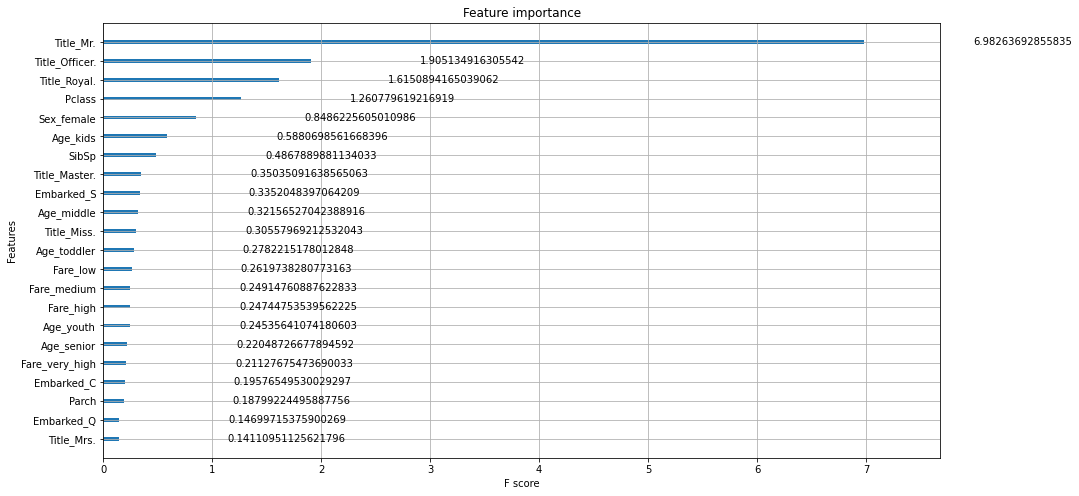

In [42]:
import xgboost as xgb

feature_data = xgb.DMatrix(X)
model.get_booster().feature_names = feature_data.feature_names
model.get_booster().feature_types = feature_data.feature_types

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 8))
xgb.plot_importance(model, ax=ax, importance_type='gain')

In [43]:
print(model.get_booster().feature_names)

['Pclass', 'SibSp', 'Parch', 'Sex_female', 'Sex_male', 'Age_kids', 'Age_middle', 'Age_senior', 'Age_toddler', 'Age_youth', 'Fare_low', 'Fare_medium', 'Fare_high', 'Fare_very_high', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Col.', 'Title_Master.', 'Title_Miss.', 'Title_Mr.', 'Title_Mrs.', 'Title_Officer.', 'Title_Royal.']


## HPO

In [44]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

def randomized_search(params, runs=20): 
    xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', 
                        random_state=2, verbosity=0, use_label_encoder=False)
    
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
    
    rand_clf = RandomizedSearchCV(xgb, params, cv=kfold, n_iter=runs, n_jobs=-1, random_state=2)
    
    rand_clf.fit(X, y)    
    
    best_model = rand_clf.best_estimator_    
    
    best_params = rand_clf.best_params_
    print("Best parameter:", best_params)
    
    best_score = rand_clf.best_score_
    print('Best accuracy:', np.round(best_score, 3))
    
    return best_model

### HPO v1

In [45]:
#'n_estimators':[100, 200, 400, 800],
#'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
#'max_depth':[1, 2, 3, 5, 6, 8],
#'gamma':[0, 0.01, 0.1, 0.5, 1, 2],
#'min_child_weight':[1, 2, 3, 4, 5],
#'subsample':[0.5, 0.7, 0.8, 0.9, 1],
#'colsample_bytree':[0.5, 0.7, 0.8, 0.9, 1]    

import time
start = time.time()

best_model = randomized_search(
    params={'learning_rate':[0.1, 0.2, 0.3, 0.4, 0.5], 
            'max_depth':[1, 2, 3, 5, 6, 8],
            'n_estimators':[50]}, 
    runs=20)

print('\nElased time: %0.2fs' % (time.time()-start))

Best parameter: {'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.2}
Best accuracy: 0.831

Elased time: 3.29s


### HPO v2

### n_estimators

In [61]:
start = time.time()

best_model = randomized_search(
    params={'n_estimators':[50, 100, 200, 400, 800]}, 
    runs=20)

print('\nElased time: %0.2fs' % (time.time()-start))

/home/ec2-user/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 5 is smaller than n_iter=20. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameter: {'n_estimators': 50}
Best accuracy: 0.824

Elased time: 4.76s


### max_depth

In [62]:
start = time.time()

best_model = randomized_search(
    params={'max_depth':[1, 2, 3, 5, 6, 8]}, 
    runs=20)

print('\nElased time: %0.2fs' % (time.time()-start))

/home/ec2-user/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameter: {'max_depth': 3}
Best accuracy: 0.832

Elased time: 1.06s


### learning_rate

In [63]:
start = time.time()

best_model = randomized_search(
    params={'learning_rate':[0.1, 0.2, 0.3, 0.4, 0.5]}, 
    runs=20)

print('\nElased time: %0.2fs' % (time.time()-start))

/home/ec2-user/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 5 is smaller than n_iter=20. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameter: {'learning_rate': 0.1}
Best accuracy: 0.832

Elased time: 1.10s


### gamma

In [64]:
start = time.time()

best_model = randomized_search(
    params={'gamma':[0, 0.01, 0.1, 0.5, 1, 2]}, 
    runs=20)

print('\nElased time: %0.2fs' % (time.time()-start))

/home/ec2-user/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameter: {'gamma': 0.5}
Best accuracy: 0.825

Elased time: 1.14s


### min_child_weight

In [65]:
start = time.time()

best_model = randomized_search(
    params={'min_child_weight':[1, 2, 3, 4, 5]}, 
    runs=20)

print('\nElased time: %0.2fs' % (time.time()-start))

/home/ec2-user/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 5 is smaller than n_iter=20. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameter: {'min_child_weight': 5}
Best accuracy: 0.832

Elased time: 1.09s


### subsample

In [66]:
start = time.time()

best_model = randomized_search(
    params={'subsample':[0.5, 0.7, 0.8, 0.9, 1]}, 
    runs=20)

print('\nElased time: %0.2fs' % (time.time()-start))

/home/ec2-user/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 5 is smaller than n_iter=20. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameter: {'subsample': 1}
Best accuracy: 0.82

Elased time: 1.16s


### colsample_bytree

In [67]:
start = time.time()

best_model = randomized_search(
    params={'colsample_bytree':[0.5, 0.7, 0.8, 0.9, 1]}, 
    runs=20)

print('\nElased time: %0.2fs' % (time.time()-start))

/home/ec2-user/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 5 is smaller than n_iter=20. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameter: {'colsample_bytree': 0.9}
Best accuracy: 0.822

Elased time: 1.06s


### All

In [68]:
best_model = randomized_search(
    params={
        'n_estimators':[50, 100],
        'learning_rate':[0.05, 0.1, 0.2],
        'max_depth':[2, 3, 5],
        'gamma':[0.5],
        'min_child_weight':[4, 5],
        'subsample':[0.9, 1],
        'colsample_bytree':[0.8, 0.9, 1]  
    }, 
    runs=20)

print('\nElased time: %0.2fs' % (time.time()-start))

Best parameter: {'subsample': 0.9, 'n_estimators': 100, 'min_child_weight': 4, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.5, 'colsample_bytree': 0.8}
Best accuracy: 0.827

Elased time: 13.38s


In [71]:
best_model = randomized_search(
    params={
        'n_estimators':[50, 100, 200, 400],
        'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
        'max_depth':[1, 2, 3, 5, 6, 8],
        'gamma':[0, 0.01, 0.1, 0.5, 1, 2],
        'min_child_weight':[1, 2, 3, 4, 5],
        'subsample':[0.5, 0.7, 0.8, 0.9, 1],
        'colsample_bytree':[0.5, 0.7, 0.8, 0.9, 1]  
    }, 
    runs=20)

print('\nElased time: %0.2fs' % (time.time()-start))

Best parameter: {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 2, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 0.01, 'colsample_bytree': 0.9}
Best accuracy: 0.835

Elased time: 73.78s


In [72]:
model = best_model

### Submission

In [73]:
test[1:10]

,Pclass,SibSp,Parch,Sex_female,Sex_male,Age_kids,Age_middle,Age_senior,Age_toddler,Age_youth,...,Embarked_C,Embarked_Q,Embarked_S,Title_Col.,Title_Master.,Title_Miss.,Title_Mr.,Title_Mrs.,Title_Officer.,Title_Royal.
1,3,1,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,2,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
3,3,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
4,3,1,1,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
5,3,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
6,3,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
7,2,1,1,0,1,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
8,3,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
9,3,2,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0


In [49]:
test.isna().sum().sum()

414

In [50]:
test[test.isna().any(axis=1)][1:10]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [51]:
def feature_engineering(df):
    df.head()
    
    # Age
    df['Age'] = df['Age'].fillna(df['Age'].median())
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    df.loc[df['Age'] <= 5, 'group'] = 'toddler'
    df.loc[(df['Age'] > 5) & (df['Age'] <= 13), 'group'] = 'kids'
    df.loc[(df['Age'] > 13) & (df['Age'] <= 30), 'group'] = 'youth'
    df.loc[(df['Age'] > 30) & (df['Age'] <= 60), 'group'] = 'middle'
    df.loc[ df['Age'] > 60, 'group'] = 'senior'

    df['Age'] = df['group']
    df = df.drop(['group'], axis=1)
    
    # Fare
    df['Fare'] = get_categorise(df['Fare'])

    # Name
    df['Title'] = df['Name'].apply(get_title)
    df = df.drop(['Name'], axis=1)

    df['Title'] = df['Title'].replace(['Capt.', 'Dr.', 'Major.', 'Rev.'], 'Officer.')
    df['Title'] = df['Title'].replace(['Lady.', 'Countess.', 'Don.', 'Sir.', 'Jonkheer.', 'Dona.'], 'Royal.')
    df['Title'] = df['Title'].replace(['Mlle.', 'Ms.'], 'Miss.')
    df['Title'] = df['Title'].replace(['Mme.'], 'Mrs.')
    
    # Cabin
    df = df.drop(['Cabin'], axis=1)
    
    # Embarked
    df['Embarked'] = df['Embarked'].fillna('S')
    #df.dropna(inplace=True)
    
    return df

In [52]:
test = feature_engineering(test)
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,892,3,male,middle,0,0,330911,low,Q,Mr.
1,893,3,female,middle,1,0,363272,low,S,Mrs.
2,894,2,male,senior,0,0,240276,medium,Q,Mr.
3,895,3,male,youth,0,0,315154,medium,S,Mr.
4,896,3,female,youth,1,1,3101298,medium,S,Mrs.
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,youth,0,0,A.5. 3236,medium,S,Mr.
414,1306,1,female,middle,0,0,PC 17758,very_high,C,Royal.
415,1307,3,male,middle,0,0,SOTON/O.Q. 3101262,low,S,Mr.
416,1308,3,male,youth,0,0,359309,medium,S,Mr.


In [53]:
test.isna().sum().sum()

0

In [54]:
test = test.drop(['PassengerId','Ticket'], axis=1)
test = pd.get_dummies(test)

In [55]:
test.head()

,Pclass,SibSp,Parch,Sex_female,Sex_male,Age_kids,Age_middle,Age_senior,Age_toddler,Age_youth,...,Embarked_C,Embarked_Q,Embarked_S,Title_Col.,Title_Master.,Title_Miss.,Title_Mr.,Title_Mrs.,Title_Officer.,Title_Royal.
0,3,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,3,1,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,2,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
3,3,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
4,3,1,1,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0


In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Pclass          418 non-null    int64
 1   SibSp           418 non-null    int64
 2   Parch           418 non-null    int64
 3   Sex_female      418 non-null    uint8
 4   Sex_male        418 non-null    uint8
 5   Age_kids        418 non-null    uint8
 6   Age_middle      418 non-null    uint8
 7   Age_senior      418 non-null    uint8
 8   Age_toddler     418 non-null    uint8
 9   Age_youth       418 non-null    uint8
 10  Fare_low        418 non-null    uint8
 11  Fare_medium     418 non-null    uint8
 12  Fare_high       418 non-null    uint8
 13  Fare_very_high  418 non-null    uint8
 14  Embarked_C      418 non-null    uint8
 15  Embarked_Q      418 non-null    uint8
 16  Embarked_S      418 non-null    uint8
 17  Title_Col.      418 non-null    uint8
 18  Title_Master.   418 non-null  

In [74]:
pred = model.predict(test)

In [75]:
pred = model.predict(test)
submission['Survived'] = pred

In [76]:
submission.to_csv("submission.csv", index=False)